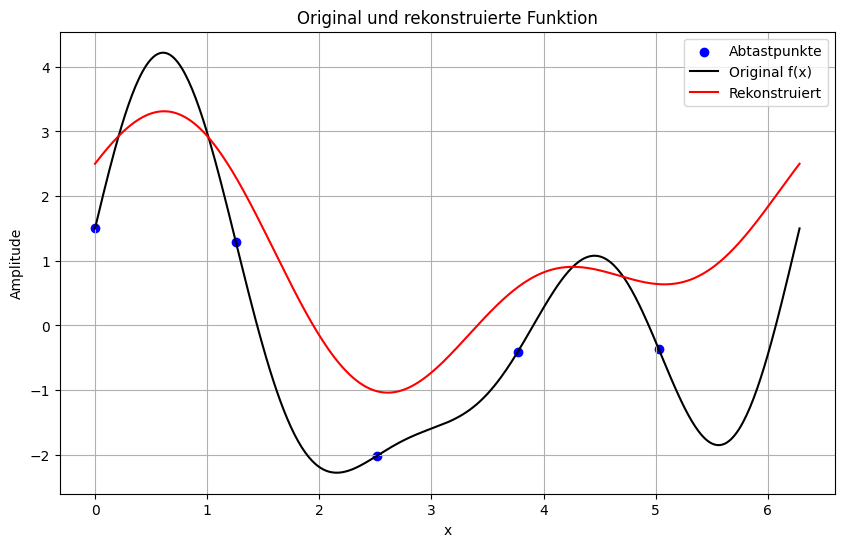

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.5 * np.cos(x) + 0.25 * np.sin(x) + 2 * np.sin(2*x) + np.sin(3*x)

# Definieren der Abtastpunkte
N_SAMPLES = 5
x_points = np.linspace(0, 2*np.pi, N_SAMPLES, endpoint=False)

# Fourier Transformation
fhat = np.fft.fft(f(x_points))

# Kontinuierliche Rekonstruktion
def reconstructed_continuous(x):
    result = np.zeros_like(x, dtype=np.complex128)
    N = len(fhat)
    for n in range(N):
        if n <= N//2:
            freq = n / (2*np.pi)
        else:
            freq = (n - N) / (2*np.pi)
        result += fhat[n] * np.exp(1j * 2 * np.pi * freq * x)
    return result.real / N

# Für die Darstellung:
x_curve = np.linspace(0, 2*np.pi, 400)

plt.figure(figsize=(10,6))
# Plot der Abtastpunkte
plt.scatter(x_points, f(x_points), label='Abtastpunkte', color='blue')

plt.plot(x_curve, f(x_curve), label='Original f(x)', color='black')
plt.plot(x_curve, reconstructed_continuous(x_curve) +1, label='Rekonstruiert', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title('Original und rekonstruierte Funktion')
plt.show()
